In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which p arts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile
from collections import Counter

import json

from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.pyplot import figure

In [24]:
def read_all(paths):
    lines=[]
    for path in paths:
        print( 'reading ', path)
        with open(path) as f:
            newlines = f.readlines()
            print( path, len(newlines))
            epochs.append( (len(newlines), path, newlines))
            lines.extend( newlines)
    return lines

In [25]:
epochs = []
folder = 'C:/mestrado/repos-github/chess-attention/train-folder/log' 
lines = read_all( [
    os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k - REFERENCE.txt'),
    os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k - REFERENCE_FINAL.txt'),
    
    os.path.join( folder, 'train_20220407_icpr2022_ref70k_--sequencias-reais-8linhas--70K-.txt'),
    os.path.join( folder, 'train_20220407_icpr2022_ref70k_part_2_try_2_--sequencias-reais-8linhas--70K-.txt'),
    os.path.join( folder, 'train_20220407_icpr2022_70k_ref_10k_part1---8linhas-handwritten--10k--v20220408-.txt'),
    os.path.join( folder, 'train_20220407_icpr2022_70k_ref_10k_ref_2k_try2---8linhas-handwritten-only-2388.txt'),
    os.path.join( folder, 'train_20220407_icpr2022_70k_ref_10k_ref_2k_part2_1---8linhas-handwritten-only-2388.txt'),
])
logs = [json.loads( line) for line in lines]
train_loss = [log['train_loss'] for log in logs]
valid_loss = [log['valid_loss'] for log in logs]
train_acc = [log['train_acc'] for log in logs]
valid_acc = [log['valid_acc'] for log in logs]
test_acc = [log['test_acc'][0][0][-1] for log in logs]
test_acc0 = [log['test_acc'][0][0][0] for log in logs]


reading  C:/mestrado/repos-github/chess-attention/train-folder/log\train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k - REFERENCE.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k - REFERENCE.txt 9
reading  C:/mestrado/repos-github/chess-attention/train-folder/log\train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k - REFERENCE_FINAL.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k - REFERENCE_FINAL.txt 12
reading  C:/mestrado/repos-github/chess-attention/train-folder/log\train_20220407_icpr2022_ref70k_--sequencias-reais-8linhas--70K-.txt
C:/mestrado/repos-github/chess-attention/train-folder/log\train_20220407_icpr2022_ref70k_--sequencias-reais-8linhas--70K-.txt 3
reading  C:/mestrado/repos-github/chess-attention/train-folder/log\train_20220407_icpr2022_ref70k_pa

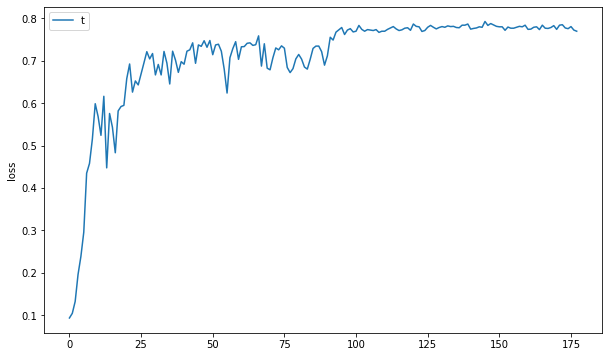

In [26]:
figure(figsize=(10, 6))
plt.plot(test_acc)
# plt.plot(gaussian_filter1d(test_acc0, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(
    ('test_acc')
)
plt.show()


In [27]:
epoch = 0
for e in epochs:
    print( epoch, e[0], e[1][-100:])
    epoch = epoch + e[0]
print( epoch)

0 9 folder/log\train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k - REFERENCE.txt
9 12 train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k - REFERENCE_FINAL.txt
21 3 chess-attention/train-folder/log\train_20220407_icpr2022_ref70k_--sequencias-reais-8linhas--70K-.txt
24 17 on/train-folder/log\train_20220407_icpr2022_ref70k_part_2_try_2_--sequencias-reais-8linhas--70K-.txt
41 50 rain-folder/log\train_20220407_icpr2022_70k_ref_10k_part1---8linhas-handwritten--10k--v20220408-.txt
91 17 train-folder/log\train_20220407_icpr2022_70k_ref_10k_ref_2k_try2---8linhas-handwritten-only-2388.txt
108 70 in-folder/log\train_20220407_icpr2022_70k_ref_10k_ref_2k_part2_1---8linhas-handwritten-only-2388.txt
178


In [28]:
print( max( test_acc))

0.7927631735801697


In [29]:
print( len( epochs))

7


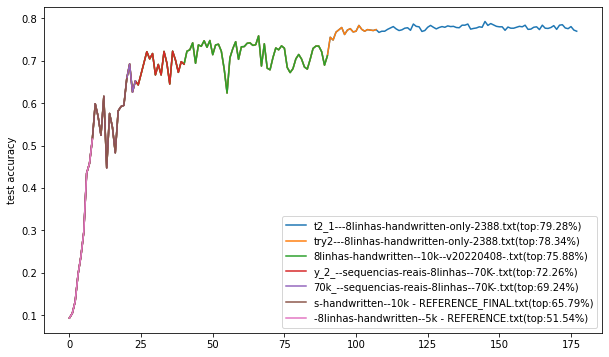

In [30]:
figure(figsize=(10, 6))
epoch = 0
acum = []
plots = []
legends = []
for e in epochs:
    lines = e[2]
    logs = [json.loads( line) for line in lines]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    acum.extend( test_acc)
    plots.append( acum.copy())
    legends.append( e[1][-40:] + '(top:{:.2f}%)'.format( max(test_acc)*100))    
plots.reverse()
legends.reverse()
for p in plots:
    plt.plot(p)
#     plt.plot(gaussian_filter1d(p, sigma=2))

    
# plt.plot(gaussian_filter1d(test_acc0, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')

plt.ylabel('test accuracy')
plt.gca().legend( legends)
# plt.gca().legend(
#     ('test_acc')
# )
plt.show()